This code clusters influencers based on keywords and then checks the similarity score between each cluster and the brands, the idea is for the recommended influencers to be of the cluster with the highest similarity.

In the event when we dont want to consider that, we have taken an average of the next top three and found the closest similarity score to that one to select the next best cluster. Taking an average of all the scores negates the essence of using the similarity score in the first place

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
#Reading dataset 
data=pd.read_csv(r"/content/influencer_keywords_nltk.csv", encoding='latin-1', low_memory=False)

In [ ]:
data.drop(data.columns[[2]], axis=1, inplace=True)
data['Word'] = data.groupby(['Influencer Name'])['Word'].transform(lambda x: ', '.join(x))
data = data.drop_duplicates().reset_index(drop = True)
data

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(data['Word'])

In [ ]:
kmeans_kwargs = {
     "init": "random",
     "n_init": 10,
     "max_iter": 300,
     "random_state": 42,
     }

In [ ]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

for k in range(2, 12):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  silhouette_coefficients.append(score)

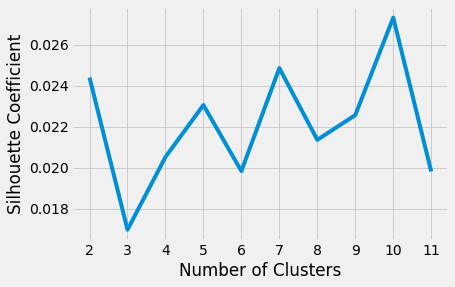

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 12), silhouette_coefficients)
plt.xticks(range(2, 12))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X)
labels=kmeans.labels_
Influencer=pd.DataFrame(list(zip(data['Influencer Name'],labels)),columns=['Influencer Name','cluster'])
print(Influencer.sort_values(by=['cluster']))

       Influencer Name  cluster
27        thebodycoach        0
2         aliceliveing        0
22             ohpolly        0
7       courtneydblack        0
29        _jackfowler_        1
5          chessieking        1
6           chloe.khan        1
17         katiepiper_        1
23        oliviadbowen        2
19           lucymeck1        2
16        jesswright77        2
0         aaroncgshore        2
10           ini.helen        2
4       charlottedawsy        2
8   danosborneofficial        2
20      mac_griffiths_        3
13        jamessmithpt        3
28     thefitnesschef_        3
24         rogersnipes        3
14           jesshunt2        4
11       itsalwayshana        5
9       gabbydawnallen        5
1          adamcollard        5
21     mattdoesfitness        6
18         korisampson        6
12         jamesgshore        6
15     jessica_rose_uk        7
3           brown.elle        8
26            sylvijaa        8
25       slimmingworld        9


In [ ]:
new_column = kmeans.fit_predict(X)
data["Cluster"] = new_column
new_influnencer_cluster=data
new_influnencer_cluster

,Influencer Name,Word,Cluster
0,aaroncgshore,"little, talia, happy, oatway, big, beautiful, ...",2
1,adamcollard,"sculpt, sets, rest, db, ups, time, kg, workout...",5
2,aliceliveing,"body, workout, try, week, side, know, feel, ti...",0
3,brown.elle,"ad, code, hair, summer, fashionnova, fashionno...",8
4,charlottedawsy,"chuffin, love, best, noah, feel, much, beltin,...",2
5,chessieking,"every, body, weeks, first, feel, love, mat, ti...",1
6,chloe.khan,"ad, new, pic, best, dress, today, happy, aaveh...",1
7,courtneydblack,"calories, workout, every, time, need, body, fe...",0
8,danosborneofficial,"little, love, amazing, go, today, time, best, ...",2
9,gabbydawnallen,"time, body, love, workout, leg, shapeupwithgab...",5


In [ ]:
new_influnencer_cluster.to_csv('ClusteredInfluencers_Keywords.csv', index=False)

In [ ]:
#Reading dataset 
brand_data=pd.read_csv(r"/content/competitor_keywords_nltk.csv", encoding='latin-1', low_memory=False)
brand_data.head()

In [ ]:
brand_data.drop(brand_data.columns[[2]], axis=1, inplace=True)
brand_data['Word'] = brand_data.groupby(['Competitor Name'])['Word'].transform(lambda x: ', '.join(x))
brand_data = brand_data.drop_duplicates().reset_index(drop = True)
brand_data

In [ ]:
!pip install -U sentence-transformers

In [ ]:
import itertools
import re
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow_hub as hub
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

In [ ]:
def get_median_similarity(model, ps1, ps2):
    """Calculates the average of the similarity score based on all the combinations of these two lists of texts.
    Using the Universal sentence encoder model."""
    sm_scores = []
    try:
        sembs_1 = model(ps1).numpy()  # Sentence embeddings for the first list of posts
        sembs_2 = model(ps2).numpy()  # Sentence embeddings for the second list of posts

        for semb in sembs_1:
            sm_scores.extend(cosine_similarity([semb], sembs_2))
    except Exception as e:
        print(e)
        # print(ps1)
        # print(ps2)
    return np.median(sm_scores)

In [ ]:
def competitor_influencerCluster_similarity():
    """Do the similarity analysis between all the competitors and influencer clusters"""
    df_competitors = brand_data
    df_influencersclusters = new_influnencer_cluster
    # Dropping the null values if there are any
   # df_influencersclusters.dropna(inplace=True)
    #df_competitors.dropna(inplace=True)
    #df_competitors = df_competitors[df_competitors['platform'] != 'website']

    # Loading the sentence transformers model.
    bert_model = SentenceTransformer('bert-base-nli-mean-tokens')
    use_model = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')


    # Getting unique values of competitor and influencer names as a list
    cmptr_list = df_competitors['Competitor Name'].unique().tolist()
    inflcr_list = df_influencersclusters['Cluster'].unique().tolist()

    final_scores = []
    # Iterating through all the competitors
    for cmptr in cmptr_list:
        # Getting all the posts belonging to the competitor given by 'cmptr'
        cmptr_posts = df_competitors.loc[df_competitors['Competitor Name'] == cmptr, 'Word'].tolist()
        # Iterating through all the influencers
        for inflcr in inflcr_list:
            # Getting all the posts belonging to the influencer cluster given by 'inflcr'
            inflcr_posts = df_influencersclusters.loc[df_influencersclusters['Cluster'] == inflcr, 'Word'].tolist()
            print('Finding similarity between the competitor', cmptr, ' and the influencer cluster', inflcr, '...')
            # Appending to the list of similarity scores for each combination of competitor and influencer cluster.
            final_scores.append(
                (cmptr, inflcr, get_median_similarity(model=use_model, ps1=cmptr_posts, ps2=inflcr_posts)))

            # Saving the results for every iteration.
            df_similarity = pd.DataFrame(final_scores,
                                         columns=['Competitor Name', 'Cluster', 'similarity_score'])
            df_similarity.to_csv('competitor_influencercluster_similarity.csv', index=False)
competitor_influencerCluster_similarity()


Finding similarity between the competitor bulk  and the influencer cluster 2 ...
Finding similarity between the competitor bulk  and the influencer cluster 5 ...
Finding similarity between the competitor bulk  and the influencer cluster 0 ...
Finding similarity between the competitor bulk  and the influencer cluster 8 ...
Finding similarity between the competitor bulk  and the influencer cluster 1 ...
Finding similarity between the competitor bulk  and the influencer cluster 6 ...
Finding similarity between the competitor bulk  and the influencer cluster 3 ...
Finding similarity between the competitor bulk  and the influencer cluster 4 ...
Finding similarity between the competitor bulk  and the influencer cluster 7 ...
Finding similarity between the competitor bulk  and the influencer cluster 9 ...
Finding similarity between the competitor formnutrition  and the influencer cluster 2 ...
Finding similarity between the competitor formnutrition  and the influencer cluster 5 ...
Finding si

In [ ]:
clustered_similarty=pd.read_csv(r"/content/competitor_influencercluster_similarity.csv", encoding='latin-1', low_memory=False)
clustered_similarty

,Competitor Name,Cluster,similarity_score
0,bulk,2,0.037149
1,bulk,5,0.256332
2,bulk,0,0.213946
3,bulk,8,0.157420
4,bulk,1,0.083583
...,...,...,...
95,puresport,6,0.069221
96,puresport,3,0.152867
97,puresport,4,0.129300
98,puresport,7,-0.010580


In [ ]:
 # select all data that contain a specific competitor
filtered_data=clustered_similarty[clustered_similarty['Competitor Name'].str.contains('formnutrition')]
new_fd = filtered_data.sort_values(by=['similarity_score'], ascending=False)
col = new_fd['similarity_score']

# Select the second to fourth values in the column
vals = col[1:4]

# Calculate the mean of the values
mean = vals.mean()
#Calculate the closest value to the mean
closest = min(new_fd['similarity_score'], key=lambda x: abs(x-mean))
Average_top_cluster=new_fd.loc[new_fd['similarity_score'] == closest ] #print the row with the closest top average value
Average_top_cluster

,Competitor Name,Cluster,similarity_score
12,formnutrition,0,0.284316


In [ ]:
#The brands with their highest similiraity score and clusters
clustered_similarty.sort_values('similarity_score', ascending = False).drop_duplicates('Competitor Name')

,Competitor Name,Cluster,similarity_score
81,liveinnermost,5,0.444623
52,neat_nutrition,0,0.423836
29,indisupplements,9,0.409813
46,motionnutrition,3,0.403256
9,bulk,9,0.373423
19,formnutrition,9,0.348402
65,neurohacker,6,0.318582
72,thenue_co,0,0.276055
92,puresport,0,0.238270
32,medterra.international,0,0.202332
